# Grover with Qiskit classes

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.circuit.library import GroverOperator
import numpy as np
import math
import random

### Prepare input state

In [2]:
# Dataset
PG_i = [int(random.random()*100) for _ in range(2**4)]
print(PG_i)

# Define the number of qubits
num_qubits = math.ceil(math.log2(len(PG_i)))

# Create the data and ancilla registers
data = QuantumRegister(num_qubits, 'data')
cr = ClassicalRegister(num_qubits, 'classical')

# Create a quantum circuit 
qc = QuantumCircuit(data, cr)

[74, 77, 74, 23, 88, 71, 47, 89, 46, 19, 65, 12, 10, 55, 18, 54]


### Define Grover Operator

In [3]:
def grover_op(num_qubits, PG_i):   
    mark_state = PG_i.index(max(PG_i))
    
    oracle = np.identity(len(PG_i))
    
    oracle[mark_state, mark_state] = -1
    
    oc = QuantumCircuit(num_qubits)
    oc.unitary(oracle, range(num_qubits))
    
    #Constructing Grover operator
    grover_op = GroverOperator(oc, insert_barriers=True)
    
    return grover_op

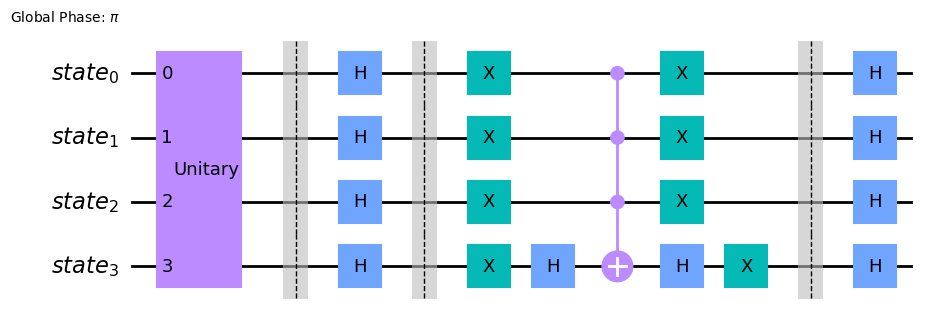

In [4]:
grover_op(num_qubits, PG_i).decompose().draw(output="mpl", fold=-1)

### Find the 2 maxima

In [5]:
for i in range(0,2):    
    # Create a uniform superposition
    qc.h(range(num_qubits))

    # Create the new Grover operator
    oc = grover_op(num_qubits, PG_i)
    
    num_iterations = int(np.sqrt(len(PG_i)))
    for _ in range(0, num_iterations):
        qc.append(oc, [*[i for i in range(num_qubits)]])

    qc.measure(data, cr)
    backend = Aer.get_backend("qasm_simulator")
    #qc = qc.reverse_bits()
    #job = execute(qc, backend, shot=1)
    job = execute(qc, backend, shot=1024)
    
    #new_theta_index = int(list(job.result().get_counts().keys())[0], 2)
    new_theta_index = int(sorted(job.result().get_counts().items(), key=lambda x: x[1])[-1][0], 2)
    
    if i == 0 : 
            
        print("FIRST QUANTUM MAX : ", PG_i[new_theta_index])
        PG_i[new_theta_index]=0
        
        # Define the number of qubits
        num_qubits = math.ceil(math.log2(len(PG_i)))

        # Create the data and ancilla registers
        data = QuantumRegister(num_qubits, 'data')
        cr = ClassicalRegister(num_qubits, 'classical')

        # Create a quantum circuit 
        qc = QuantumCircuit(data, cr)
    else:
        print("SECONDE QUANTUM MAX : ", PG_i[new_theta_index])
        PG_i[new_theta_index]=0

FIRST QUANTUM MAX :  89
SECONDE QUANTUM MAX :  88


### Verify there is no other max

In [6]:
PG_i.sort()
print(PG_i)

[0, 0, 10, 12, 18, 19, 23, 46, 47, 54, 55, 65, 71, 74, 74, 77]


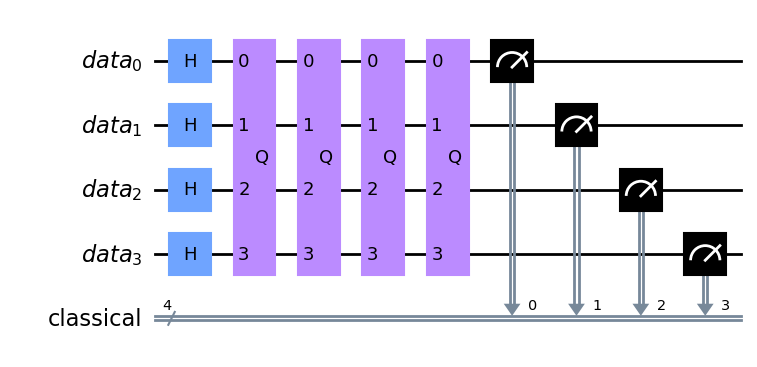

In [7]:
qc.draw(output="mpl")